In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import model_selection
#import seaborn for statistical plots
import seaborn as sns
#to enable plotting graph in jupter notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.model_selection import GridSearchCV

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
colnames=['cultivt','alcoh','mal.acid','ash','acl','magns','phenol','flavonoids','non_flavono','Proanth','Color.int','Hue','OD','Proline']

In [5]:
#colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
data = pd.read_csv("wine.xls",names=colnames)
data.head()

,cultivt,alcoh,mal.acid,ash,acl,magns,phenol,flavonoids,non_flavono,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.head()

,cultivt,alcoh,mal.acid,ash,acl,magns,phenol,flavonoids,non_flavono,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
#data.outcome.value_counts()

In [11]:
data.shape

(178, 14)

In [12]:
data.isnull().sum()

cultivt        0
alcoh          0
mal.acid       0
ash            0
acl            0
magns          0
phenol         0
flavonoids     0
non_flavono    0
Proanth        0
Color.int      0
Hue            0
OD             0
Proline        0
dtype: int64

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


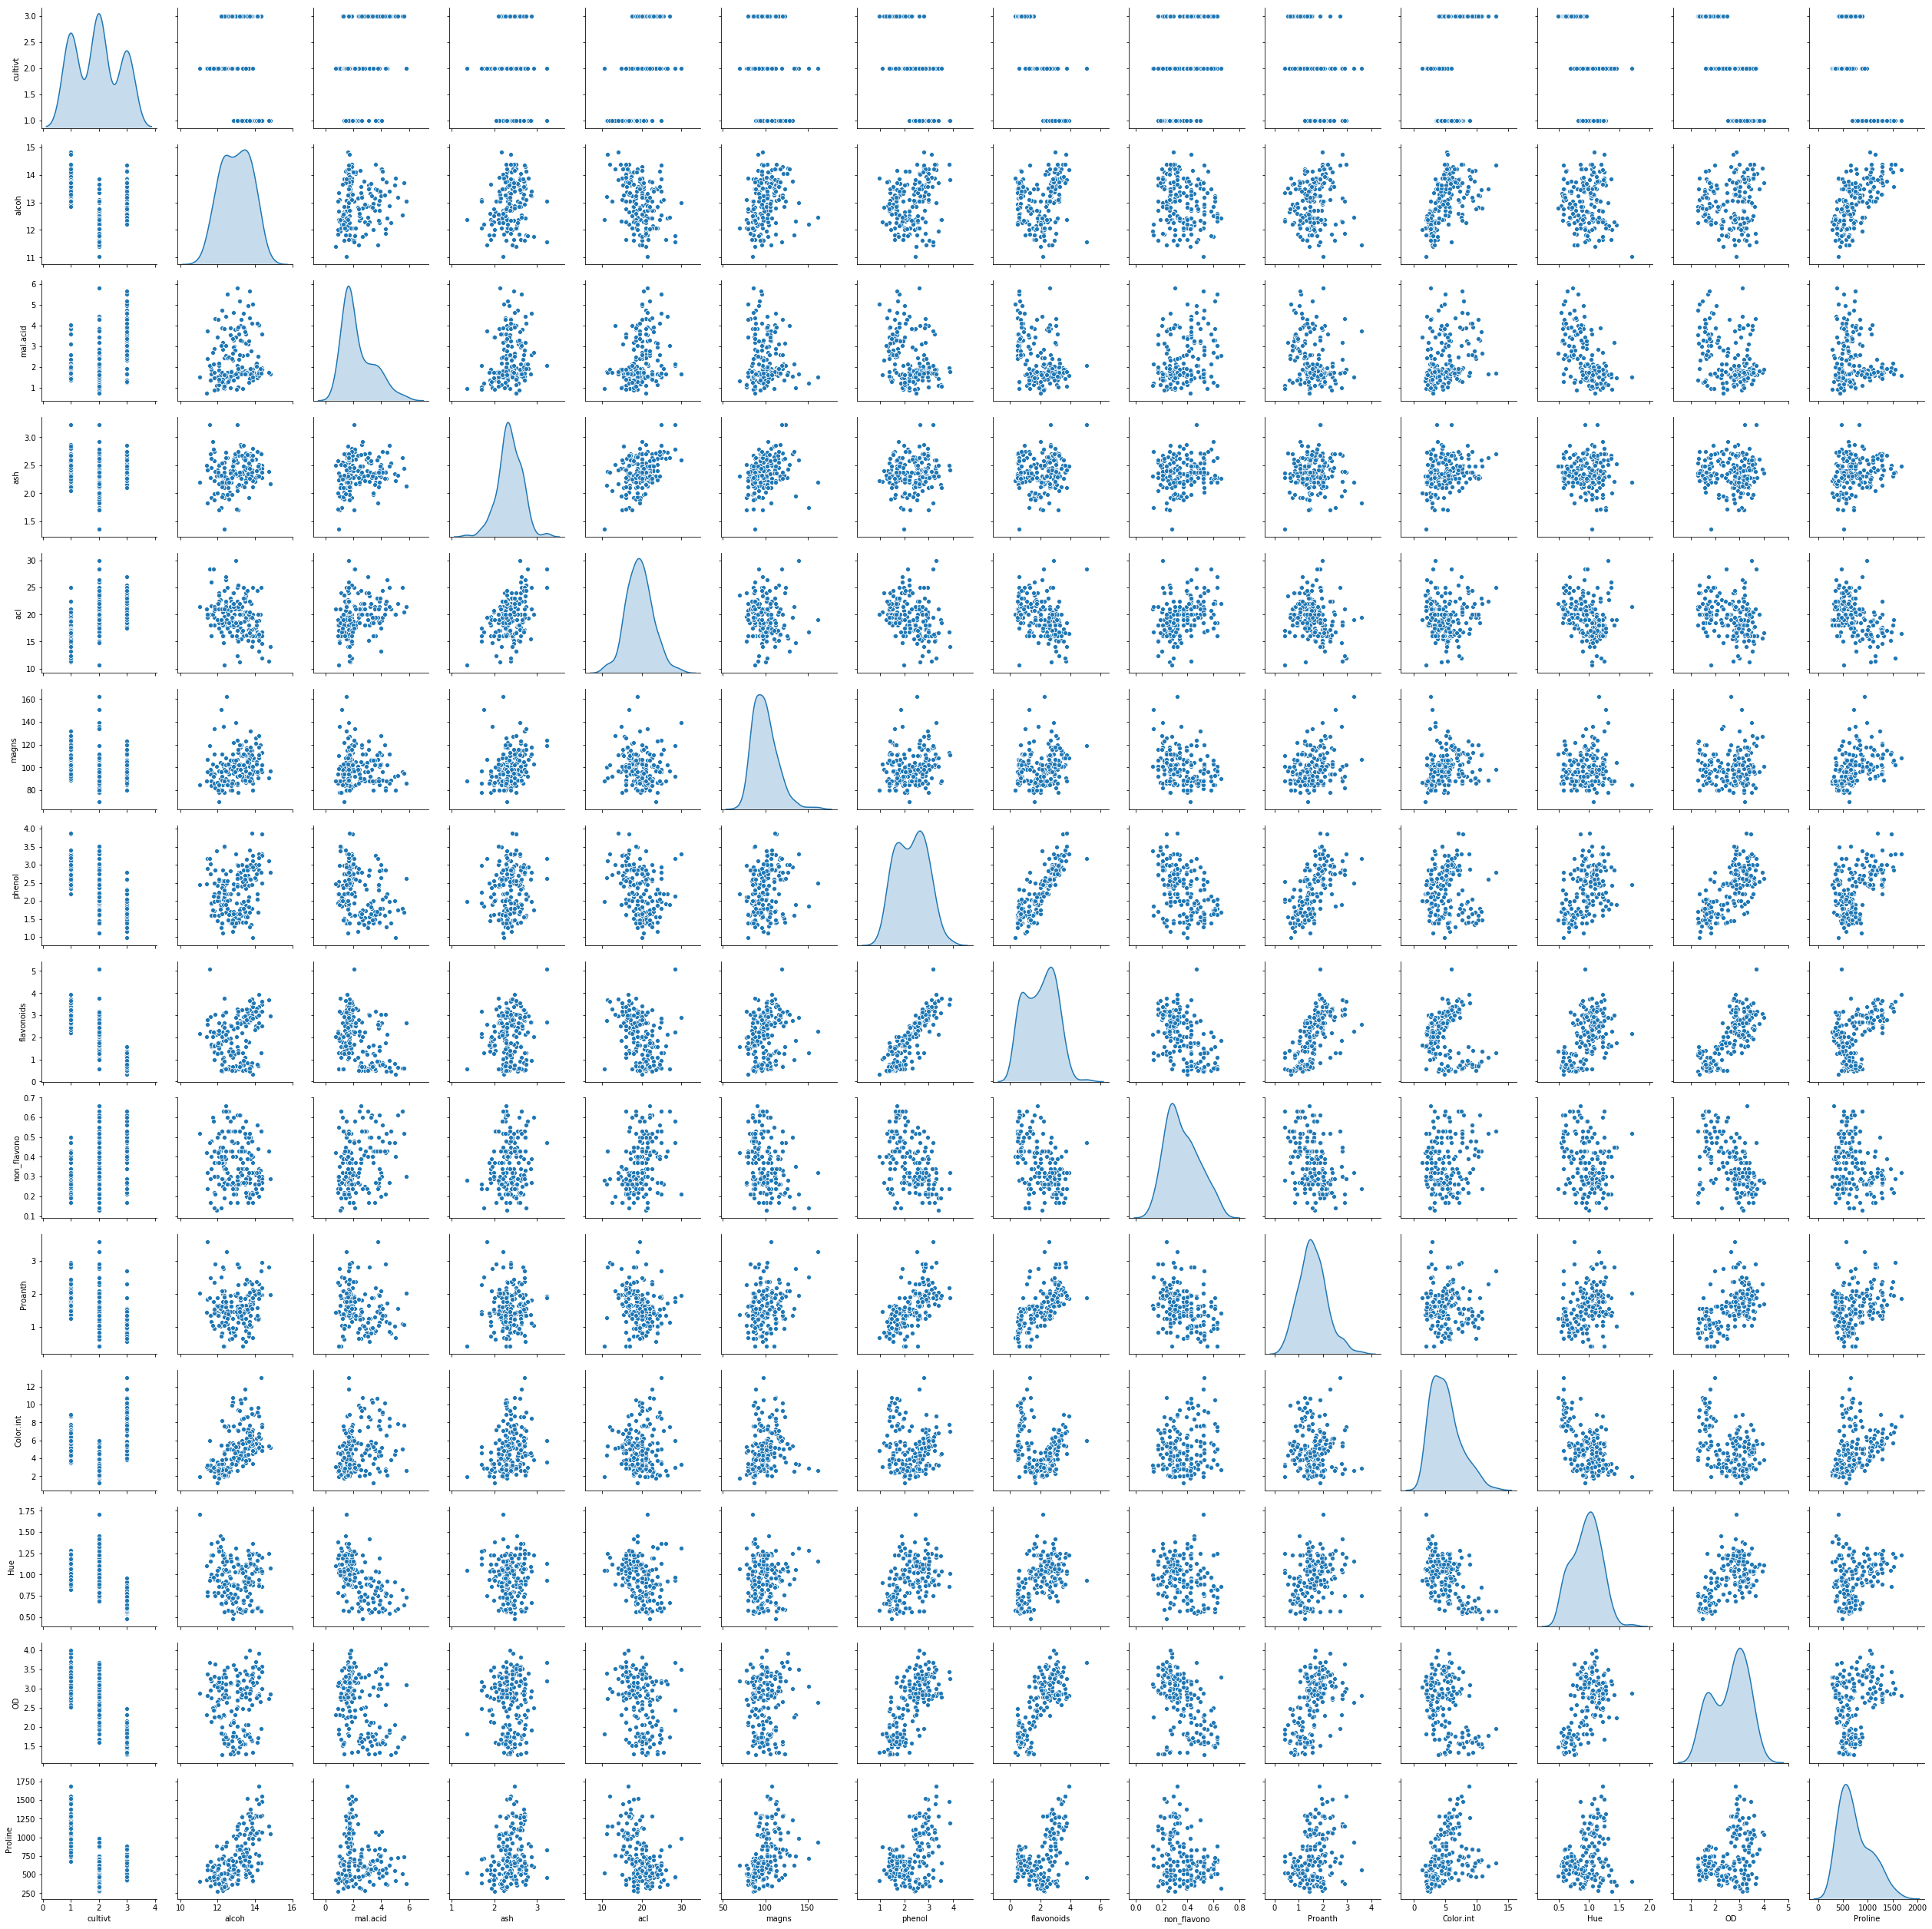

In [13]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [14]:
data.cultivt.value_counts()

2    71
1    59
3    48
Name: cultivt, dtype: int64

In [15]:
x=data.drop('cultivt',axis=1)
y=data['cultivt']
x_std=StandardScaler().fit_transform(x)
x.head()

,alcoh,mal.acid,ash,acl,magns,phenol,flavonoids,non_flavono,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
type(x_std)

numpy.ndarray

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=2)


In [19]:
#y_predi=model.predict(x_test)

In [94]:
#ac=metrics.accuracy_score(y_test,y_predi)
#print(ac)

In [95]:
#cm=metrics.confusion_matrix(y_test,y_predi)
#print(cm)

In [34]:
model_df1=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_rf1=RandomForestClassifier(criterion='entropy',random_state=0)
model_nb1=GaussianNB()
model_lr1=LogisticRegression()
model_df1.fit(x_train,y_train)
pred1=model_df1.predict(x_test)
model_rf1.fit(x_train,y_train)
pred2=model_rf1.predict(x_test)
model_nb1.fit(x_train,y_train)
pred3=model_nb1.predict(x_test)
model_lr1.fit(x_train,y_train)
pred4=model_lr1.predict(x_test)

In [36]:
#decision tree max_depth
params={'max_depth':np.arange(1,10)}
#knn=KNeighborsRegressor()
GS=GridSearchCV(model_df1,params,cv=5)
GS.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
GS.best_params_

{'max_depth': 2}

In [37]:
#random forest max_depth
params={'max_depth':np.arange(1,10)}
#knn=KNeighborsRegressor()
GS1=GridSearchCV(model_rf1,params,cv=5)
GS1.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
GS1.best_params_

{'max_depth': 5}

In [38]:
params={'n_estimators':np.arange(1,100)}
#knn=KNeighborsRegressor()
GS=GridSearchCV(model_rf1,params,cv=3)
GS.fit(x,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
GS.best_params_

{'n_estimators': 14}

In [58]:
model_df=DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=0)
model_df.fit(x_train,y_train)
pred1=model_df.predict(x_test)
model_rf=RandomForestClassifier(n_estimators=14,criterion='entropy',max_depth=5,random_state=0)
model_rf.fit(x_train,y_train)
pred2=model_rf.predict(x_test)
model_nb=GaussianNB()

model_nb.fit(x_train,y_train)
pred3=model_nb.predict(x_test)

model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
pred4=model_lr.predict(x_test)

In [59]:
models=[]
models.append(('DecisionTree',model_df))
models.append(('RandomForest',model_rf))
models.append(('Gaussian',model_nb))
models.append(('logisticregression',model_lr))

In [60]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)

DecisionTree:0.847386(0.137535)
RandomForest:0.920915(0.085479)
Gaussian:0.961111(0.055833)
logisticregression:0.972222(0.037268)


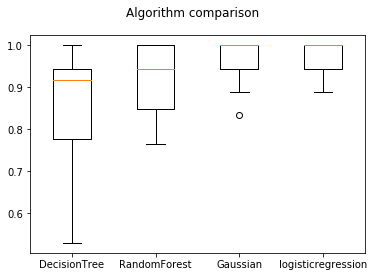

In [61]:
fig=plt.figure()
fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
#pred_test_proba=model_df.predict_proba(x_test)
fpr,tpr,thershold=metrics.roc_curve(y_test,pred1)
plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

ValueError: multiclass format is not supported